In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## loading data

In [25]:
raw_data= pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Processing

### explore the descriptive stastics of the variables

In [26]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [27]:
data=raw_data.drop(['Model'],axis=1)

### dealing with missing values

In [28]:
data_no_mv= data.dropna(axis=0)

### exploring PDFs

C:\Users\21624\AppData\Local\Temp\ipykernel_13452\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

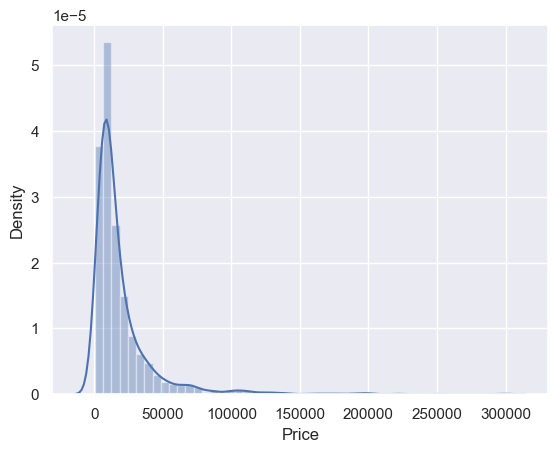

In [29]:
sns.distplot(data_no_mv['Price'])

### eliminate outliers

In [30]:
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [31]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data_no_mv['Mileage']<q]

C:\Users\21624\AppData\Local\Temp\ipykernel_13452\1221989913.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2=data1[data_no_mv['Mileage']<q]


In [32]:
data3=data2[data2['EngineV']<6.5]

C:\Users\21624\AppData\Local\Temp\ipykernel_13452\2868281899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['EngineV'])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

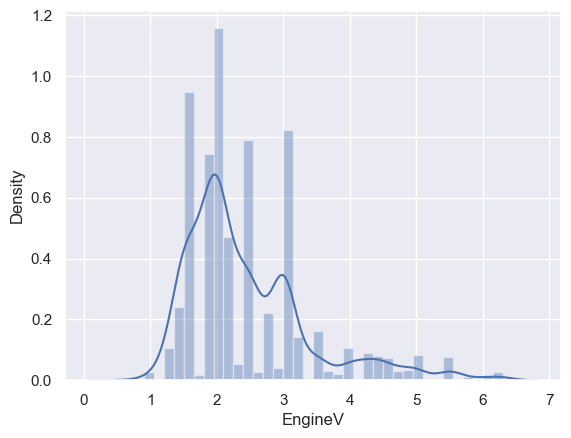

In [33]:
sns.distplot(data3['EngineV'])

C:\Users\21624\AppData\Local\Temp\ipykernel_13452\3683276752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data4['Year'])


<AxesSubplot: xlabel='Year', ylabel='Density'>

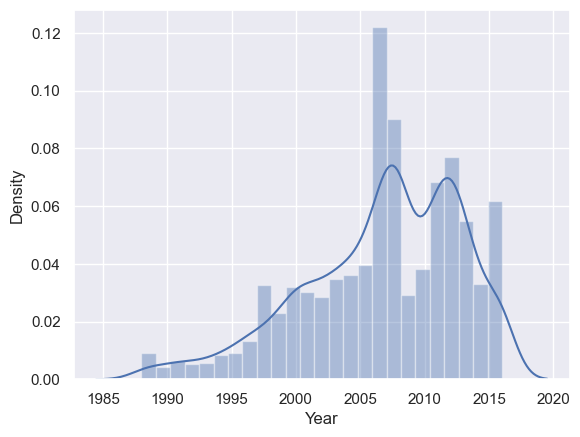

In [34]:
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]
sns.distplot(data4['Year'])

In [35]:
data_cleaned=data4.reset_index(drop='True')

## check the OLS assumptions

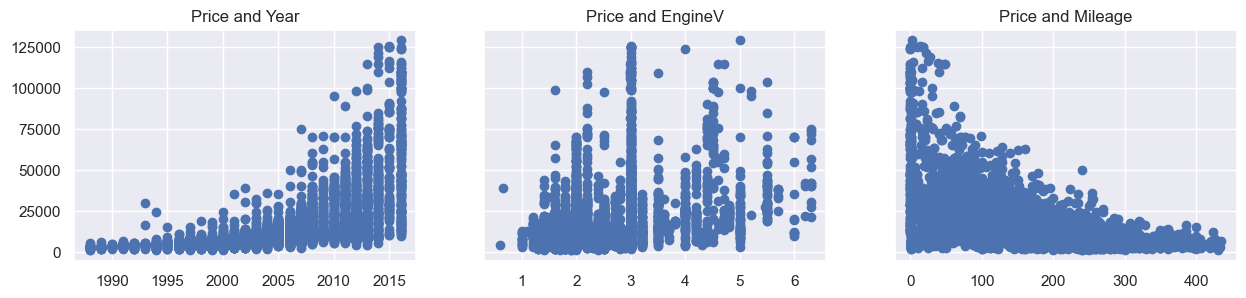

In [43]:
f, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [37]:
log_price= np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


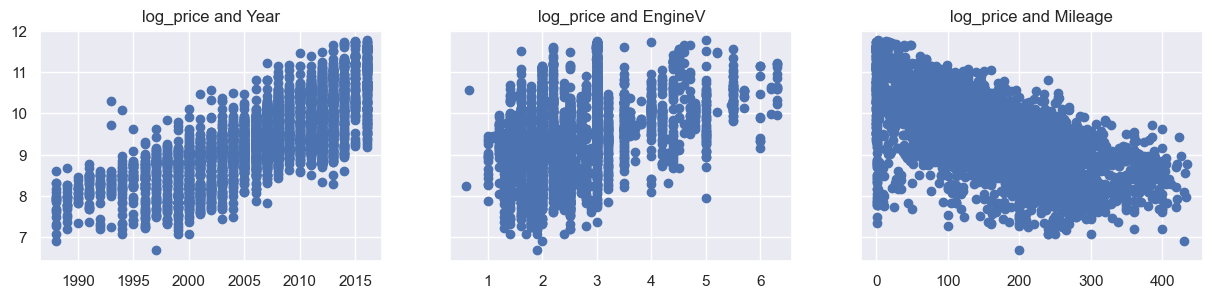

In [39]:
f, (ax1,ax2,ax3)= plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

## Multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i) for i in range (variables.shape[1])]
vif["features"]=variables.columns

In [41]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [42]:
data_no_multiCo=data_cleaned.drop(['Year'],axis=1)

### create dummy variables 

In [45]:
data_with_dummies= pd.get_dummies(data_no_multiCo,drop_first=True)

In [46]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [47]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [51]:
cols = ['log_price','Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [52]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#  Linear ragression model

### Declare the inputs and the targets

In [53]:
target=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

### scale the data

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [58]:
inputs_scaled= scaler.transform(inputs)

### test train split 

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

### create regression

In [62]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
y_hat=reg.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

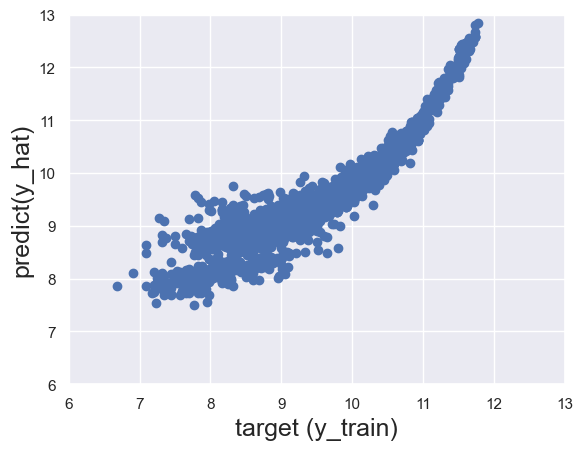

In [64]:
plt.scatter(y_train,y_hat)
plt.xlabel('target (y_train)', size=18)
plt.ylabel('predict(y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

C:\Users\21624\AppData\Local\Temp\ipykernel_13452\2557577697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)


Text(0.5, 1.0, 'residual')

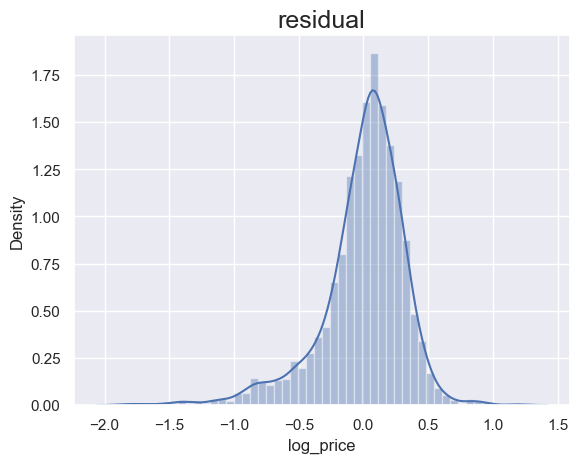

In [65]:
sns.distplot(y_train-y_hat)
plt.title("residual",size=18)

In [66]:
reg.score(x_train,y_train)

0.8613387128149418

In [67]:
reg.intercept_

9.417887576235454

In [68]:
reg.coef_

array([ 0.47016103, -0.20613177,  0.10134996,  0.002997  , -0.01018191,
       -0.06544045, -0.09865781, -0.0119512 , -0.0356834 , -0.07932256,
       -0.03509751, -0.09525154, -0.0571305 , -0.0705021 , -0.04685037,
       -0.01234463, -0.05755958,  0.25218298])

In [69]:
reg_summary=pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights']=reg.coef_
reg_summary

,Features,weights
0,Price,0.470161
1,Mileage,-0.206132
2,EngineV,0.101350
3,Brand_BMW,0.002997
4,Brand_Mercedes-Benz,-0.010182
5,Brand_Mitsubishi,-0.065440
6,Brand_Renault,-0.098658
7,Brand_Toyota,-0.011951
8,Brand_Volkswagen,-0.035683
9,Body_hatch,-0.079323


## Testing

In [70]:
y_hat_test=reg.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

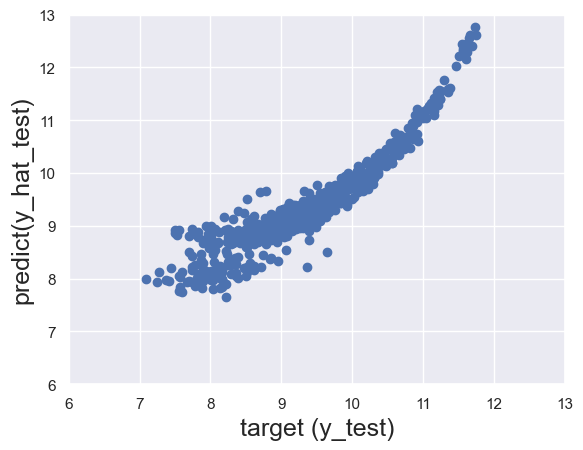

In [73]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('target (y_test)', size=18)
plt.ylabel('predict(y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show